In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# n =[]
# x= 0
# for i in [1,2,3,4]:
#     x = x+ i
#     n.append(x) 
# print(n)       

In [3]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.info()

#Time_point_abbr is the location

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

In [4]:
#show all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [6]:
#calculate percentage of ontime value =1 div by all rows

wego['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

In [7]:
#77 percent of the buses arrived on time
270048/(270048+80281)

0.7708411236295025

In [8]:
wego['PREV_SCHED_STOP_CANCELLED'].value_counts()

PREV_SCHED_STOP_CANCELLED
0.0    275746
1.0      4254
Name: count, dtype: int64

In [9]:
#Count the values that each row occurs
adjcounts= wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 
                        'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
adjcounts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,270048
1,0,1,0,59038
2,0,0,0,11468
3,1,0,0,9775


In [10]:
#percentage of ontime trips
((adjcounts['count'].loc[0])/(adjcounts['count']
                              .loc[0]+adjcounts['count']
                           .loc[1]+adjcounts['count'].loc[3]))


# ALt# Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

0.7969285341187095

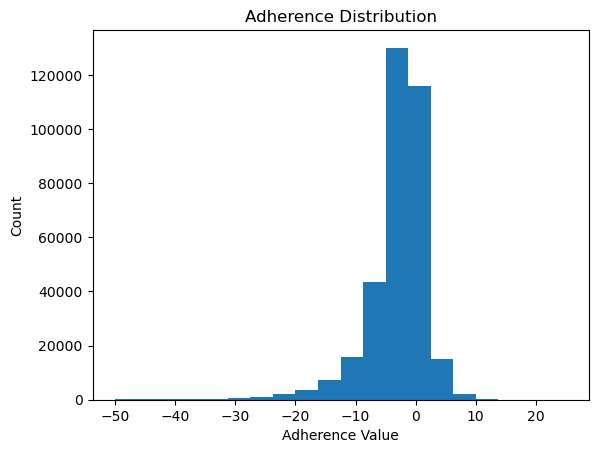

In [11]:
plt.hist(x=wego['ADHERENCE'],bins=20,range=(-50, 25))  #, y= wego['HDWY_DEV'])
plt.title('Adherence Distribution')
plt.xlabel('Adherence Value')
plt.ylabel('Count')
plt.show()

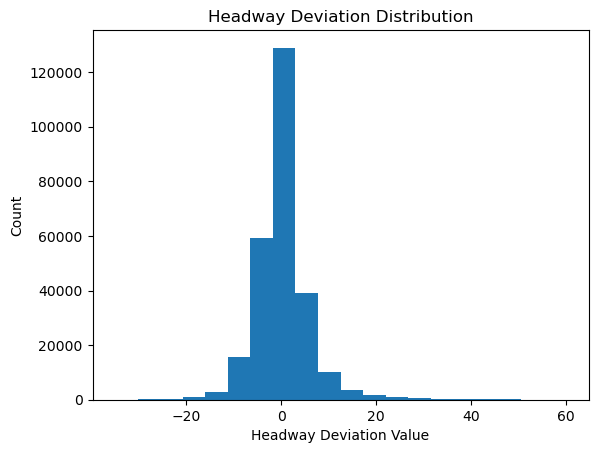

In [12]:
plt.hist(x=wego['HDWY_DEV'],bins=20,range=(-35, 60))  #, y= wego['HDWY_DEV'])
plt.title('Headway Deviation Distribution')
plt.xlabel('Headway Deviation Value')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='HDWY_DEV'>

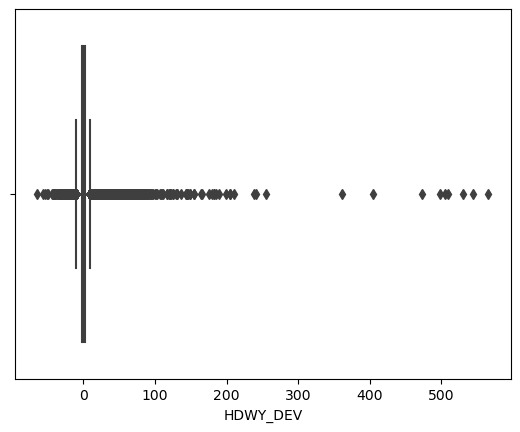

In [13]:
sns.boxplot(x='HDWY_DEV', data=wego)

<Axes: xlabel='ADHERENCE'>

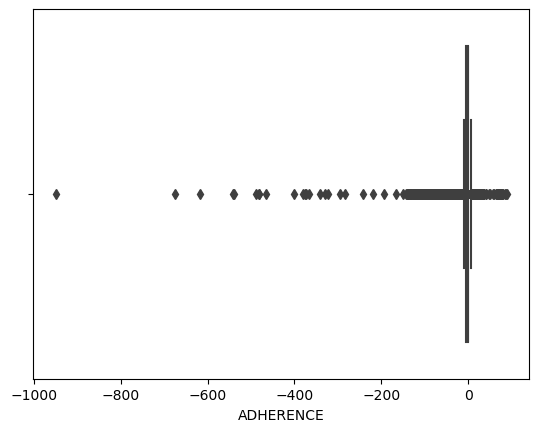

In [14]:
sns.boxplot(x='ADHERENCE', data=wego)

In [15]:
#sns.displot(data=wego["ADHERENCE"], kde=True)
#sns.violinplot(data=wego,x=wego["ADHERENCE"])

In [16]:
wego['IS_RELIEF'].value_counts()

IS_RELIEF
0    346141
1      4188
Name: count, dtype: int64

In [17]:
# ontime = wego[wego['ADJUSTED_ONTIME_COUNT']==1]& #add scheduled column value is 1
# ontime.head()

In [18]:
#wego['ADHERENCE'].agg(min, max)
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796


In [19]:
wego['ADHERENCE'].max()

88.383333

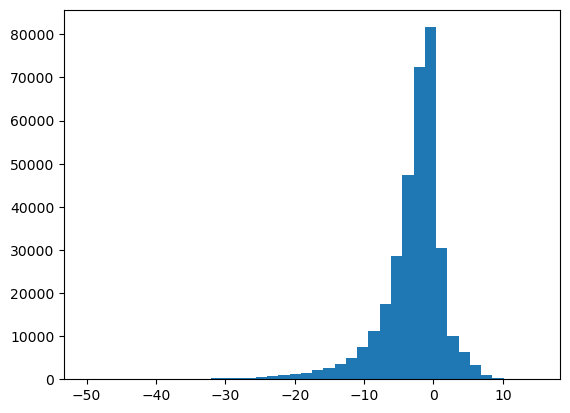

In [20]:
plt.hist(x=wego['ADHERENCE'],bins=40, range=(-50, 15))  #, y= wego['HDWY_DEV'])
plt.show()

In [21]:
#trim cancelled = 1 and headway great
sced = wego[wego['PREV_SCHED_STOP_CANCELLED']==1]
#sced
adsort= sced.sort_values(['ACTUAL_HDWY'])
adsort.shape

(4254, 30)

In [22]:
wego2 = wego[wego['PREV_SCHED_STOP_CANCELLED']!=1]
wego2.shape

(346075, 30)

In [23]:
#percentile cleaning
headway =wego2['HDWY_DEV']
headway2 = headway.dropna()
headwaydev_1= np.percentile(headway2,.1)
headwaydev_99=np.percentile(headway2,99.9)

print(headwaydev_1)
print(headwaydev_99)

-21.624767162
56.43715000000084


In [24]:
wego3= wego2[wego2['HDWY_DEV']>=56]

wego3.shape

(269, 30)

###Cleaned wego data removed PREV_SCHED_STOP_CANCELLED = 1 and Where early, late and on-time = 0

In [25]:
#df.drop(df[(df['col_1'] == 1.0) & (df['col_2'] == 0.0)].index)

wego4 = wego2.drop(wego2[(wego2.ADJUSTED_EARLY_COUNT==0)& (wego2.ADJUSTED_LATE_COUNT==0) & 
                        (wego2.ADJUSTED_ONTIME_COUNT==0)].index)

wego4.shape

(335191, 30)

In [26]:
wego4['ADJUSTED_ONTIME_COUNT'].value_counts()

ADJUSTED_ONTIME_COUNT
1    267312
0     67879
Name: count, dtype: int64

In [27]:
adjcounts2= wego4[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 
                        'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
adjcounts2

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,267312
1,0,1,0,58183
2,1,0,0,9696


In [28]:
# On-time performance

267312/(267312+58183+9696)

0.7974915794278487

## Buses are on-time 80 percent of the time

In [29]:
#percentile cleaning
headwy =wego4['HDWY_DEV']
headwy2 = headwy.dropna()
headwydev_1= np.percentile(headwy2,.1)
headwydev_99=np.percentile(headwy2,99.9)

print(headwydev_1)
print(headwydev_99)

-21.624767162
56.43715000000084


In [30]:
#percentile cleaning
adhe =wego4['ADHERENCE']
adhe_1= np.percentile(adhe,.1)
adhe_99=np.percentile(adhe,99.9)

print(adhe_1)
print(adhe_99)

-57.040499999999994
9.466666


In [31]:
wego5 = wego4.drop(wego4[wego4.ADHERENCE < adhe_1].index)
wego6 = wego5.drop(wego5[wego5.ADHERENCE > adhe_99].index)
wego7 = wego6.drop(wego6[wego6.HDWY_DEV < headwydev_1].index)
wego8 = wego7.drop(wego7[wego7.HDWY_DEV > headwydev_99].index)
wego8.shape

(334031, 30)

In [32]:
wegos=wego8
wegos.head(100)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN


In [33]:
adjusted_counts = wego8[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

In [34]:
adjusted_counts.head()

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,266891
1,0,1,0,57690
2,1,0,0,9450


In [35]:
#On-time
#266891/(266891+57690+9450)
#round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego.shape[0]) * 100, 2)


In [36]:
#Early
9450/(266891+57690+9450)

0.028290787382009453

In [37]:
#Late
57690/(266891+57690+9450)

0.1727085210654101

# check

In [38]:
wego9 = wego8['SCHEDULED_HDWY']!=0
wego9.shape

(334031,)

In [39]:
wego8['HDWY_DEV_PER']= (wego8['HDWY_DEV']/wego8['SCHEDULED_HDWY']*100)


In [40]:
(wego['SCHEDULED_HDWY']==0).value_counts()

SCHEDULED_HDWY
False    350221
True        108
Name: count, dtype: int64

In [41]:
wego8['HDWY_DEV_PER'].shape

(334031,)

In [42]:
# wego8['SCHED_HDWY']=wego8['SCHEDULED_HDWY'].replace(0, 0, inplace=True)
# wego8.head()

In [43]:
a = wego8['SCHEDULED_HDWY'].value_counts().reset_index().sort_values(by='SCHEDULED_HDWY')
a

,SCHEDULED_HDWY,count
48,0.0,104
41,2.0,160
25,5.0,640
54,6.0,68
30,7.0,375
22,8.0,998
8,9.0,4317
0,10.0,66861
6,11.0,4701
4,12.0,18889


In [44]:
wego8['HDWY_DEV_PER']= (wego8['HDWY_DEV']/wego8['SCHEDULED_HDWY']*100)
wego8.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN


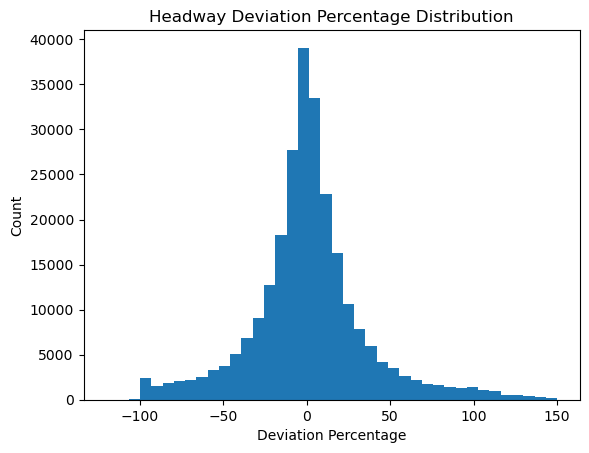

In [45]:
plt.hist(x=wego8['HDWY_DEV_PER'],bins=40, range=(-120, 150))
plt.title('Headway Deviation Percentage Distribution')
plt.xlabel('Deviation Percentage')
plt.ylabel('Count')
plt.show()

In [46]:
wego8['BUNCHING'] = np.where((wego8['HDWY_DEV_PER']<-50), 1,0)

In [47]:
wego8['GAPPING'] = np.where((wego8['HDWY_DEV_PER']>50), 1,0)

In [48]:
wego8['NORMAL'] = np.where(((wego8['HDWY_DEV_PER']>=-50) & (wego8['HDWY_DEV_PER']<=50)), 1, 0)

In [49]:
wego8.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,BUNCHING,GAPPING,NORMAL
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0


In [50]:
# wego8 = wego8.drop('SCHED_HDWY', axis='columns')

In [51]:
wego8.head(100)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,BUNCHING,GAPPING,NORMAL
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,7.619046,0,0,1
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,5.619046,0,0,1
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,-3.222227,0,0,1


In [52]:
wego8[['BUNCHING','NORMAL','GAPPING']].value_counts()

BUNCHING  NORMAL  GAPPING
0         1       0          223482
          0       0           72701
                  1           20605
1         0       0           17243
Name: count, dtype: int64

In [53]:
hdwygroup = wego8[['ROUTE_DIRECTION_NAME','BUNCHING','NORMAL','GAPPING']].value_counts().reset_index()
hdwygroup

,ROUTE_DIRECTION_NAME,BUNCHING,NORMAL,GAPPING,count
0,FROM DOWNTOWN,0,1,0,114989
1,TO DOWNTOWN,0,1,0,108493
2,FROM DOWNTOWN,0,0,0,37802
3,TO DOWNTOWN,0,0,0,34899
4,FROM DOWNTOWN,0,0,1,12968
5,FROM DOWNTOWN,1,0,0,11233
6,TO DOWNTOWN,0,0,1,7637
7,TO DOWNTOWN,1,0,0,6010


<Axes: xlabel='BUNCHING', ylabel='count'>

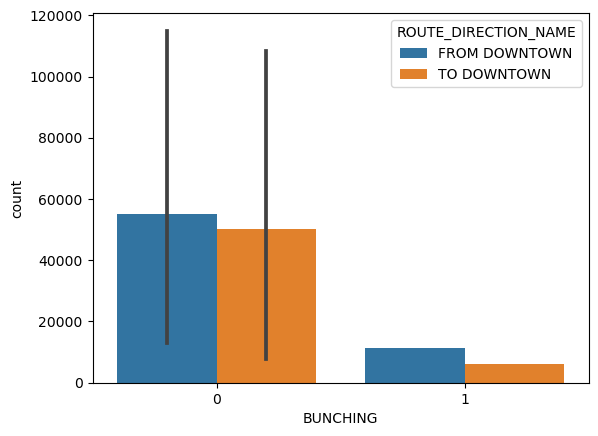

In [54]:
# plt.hist(x=hdwygroup['HDWY_DEV_PER'],bins=40, range=(-120, 150))
# plt.title('Headway Deviation Percentage Distribution')
# plt.xlabel('Deviation Percentage')
# plt.ylabel('Count')
# plt.show()

sns.barplot(x = 'BUNCHING',
            y = 'count',
            hue = 'ROUTE_DIRECTION_NAME' ,
            data = hdwygroup)

# hdwygroup.plot(kind = 'bar, stacked=True, color = ['BUNCHING','NORMAL', 'GAPPING'])
            

<Axes: xlabel='GAPPING', ylabel='count'>

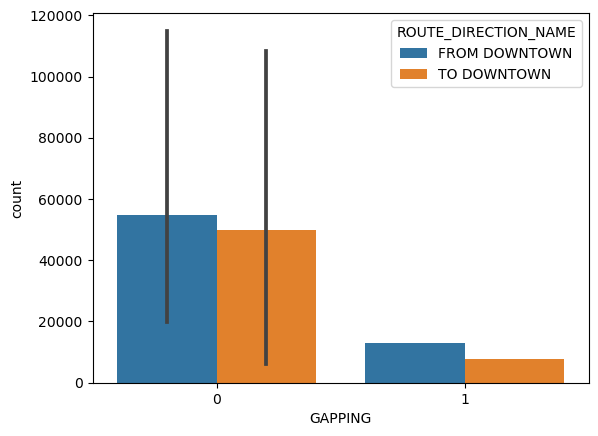

In [55]:
sns.barplot(x = 'GAPPING',
            y = 'count',
            hue = 'ROUTE_DIRECTION_NAME' ,
            data = hdwygroup)

<Axes: xlabel='NORMAL', ylabel='count'>

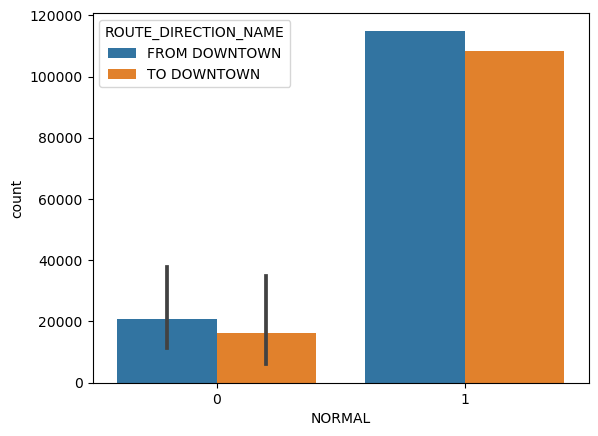

In [56]:
sns.barplot(x = 'NORMAL',
            y = 'count',
            hue = 'ROUTE_DIRECTION_NAME' ,
            data = hdwygroup)

In [57]:
# wego8[['ROUTE_DIRECTION_NAME','OPERATOR','ADJUSTED_ONTIME_COUNT']].value_counts()

In [58]:
wego8[['ROUTE_DIRECTION_NAME','ADJUSTED_ONTIME_COUNT']].value_counts()

ROUTE_DIRECTION_NAME  ADJUSTED_ONTIME_COUNT
TO DOWNTOWN           1                        133752
FROM DOWNTOWN         1                        133139
                      0                         43853
TO DOWNTOWN           0                         23287
Name: count, dtype: int64

In [59]:
133752/(133752+133139)

0.501148408901012

In [60]:
print(f"On-time percentage heading to downtown:{round(100*(133752/(133752+23287)))}")
print(f"On-time percentage heading from downtown:{round(100*(133139/(133139+43853)))}")
133752/(133752+23287)

On-time percentage heading to downtown:85
On-time percentage heading from downtown:75


0.8517119951094951

### 85 percent of the buses heading to downtown arrive on time

In [61]:
133139/(133139+43853)

0.7522317392876514

### 75 percent of the buses heading from downtown arrive on time

# Percentage of Arrival heading to and from downtown

In [62]:
print(f"Early percentage heading to downtown:{round(100*(4338/(152701+4338)),2)}%")
print(f"Early percentage heading from downtown:{round(100*(5112/(171880+5112)),2)}%\n")

print(f"On-time percentage heading to downtown:{round(100*(133752/(133752+23287)))}%")
print(f"On-time percentage heading from downtown:{round(100*(133139/(133139+43853)))}%\n")

print(f"Late percentage heading to downtown:{round(100*(18949/(138090+18949)))}%")
print(f"Late percentage heading from downtown:{round(100*(38741/(138251+38741)))}%")

Early percentage heading to downtown:2.76%
Early percentage heading from downtown:2.89%

On-time percentage heading to downtown:85%
On-time percentage heading from downtown:75%

Late percentage heading to downtown:12%
Late percentage heading from downtown:22%


In [63]:
wego8[['ROUTE_DIRECTION_NAME','ADJUSTED_EARLY_COUNT']].value_counts()

ROUTE_DIRECTION_NAME  ADJUSTED_EARLY_COUNT
FROM DOWNTOWN         0                       171880
TO DOWNTOWN           0                       152701
FROM DOWNTOWN         1                         5112
TO DOWNTOWN           1                         4338
Name: count, dtype: int64

In [64]:
# # df.loc[(df['team'] == 'A') & (df['conference'] == 'East'), 'points'].sum()

# wego8.loc[(wego8['ADJUSTED_EARLY_COUNT'] == 1) & (wego8['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN')].sum()
# #(wego8['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN') & (wego8['ADJUSTED_EARLY_COUNT']==1)

In [65]:
#Early from downtown
5112/(171880+5112)

0.028882661363225457

In [66]:
#Early to downtown
4338/(152701+4338)

0.027623711307382243

In [67]:
wego8[['ROUTE_DIRECTION_NAME','ADJUSTED_LATE_COUNT']].value_counts()

ROUTE_DIRECTION_NAME  ADJUSTED_LATE_COUNT
FROM DOWNTOWN         0                      138251
TO DOWNTOWN           0                      138090
FROM DOWNTOWN         1                       38741
TO DOWNTOWN           1                       18949
Name: count, dtype: int64

In [68]:
#Late from downtown
print(38741/(138251+38741))
#Late to downtown
print(18949/(138090+18949))

0.21888559934912313
0.12066429358312267


In [69]:
#Location
wego8[['TIME_POINT_ABBR','ADJUSTED_ONTIME_COUNT']].value_counts()

TIME_POINT_ABBR  ADJUSTED_ONTIME_COUNT
GXRVRGAT         1                        11749
DWMRT            1                        11607
WHBG             1                         8810
MCC4_18          1                         8784
GXMADISO         1                         8289
GXGRNFLD         1                         8037
GXFIVEPT         1                         7897
HHWM             1                         7643
MCC4_15          1                         7615
MCC4_24          1                         7535
MCC5_10          1                         6980
MCC4_19          1                         6975
DKTL             1                         6961
MXTHOMP          1                         6905
MXBELL           1                         6729
WMRT             1                         6724
N1SP             1                         6644
MCC5_5           1                         6573
MXWHARF          1                         6542
NVFG             1                         6485
C

In [70]:
wego8[['ROUTE_DIRECTION_NAME','BUNCHING', 'GAPPING']].value_counts()

ROUTE_DIRECTION_NAME  BUNCHING  GAPPING
FROM DOWNTOWN         0         0          152791
TO DOWNTOWN           0         0          143392
FROM DOWNTOWN         0         1           12968
                      1         0           11233
TO DOWNTOWN           0         1            7637
                      1         0            6010
Name: count, dtype: int64

# use scheduled_time for datetime

In [77]:
# wego_per = (wego8.groupby(['TIME_POINT_ABBR','ROUTE_DIRECTION_NAME'])['ADJUSTED_ONTIME_COUNT']
#             .sum()/wego8.groupby(['TIME_POINT_ABBR'])['ADJUSTED_ONTIME_COUNT'].sum())
# wego_per

# wego_per.unstack().plot.barh(stacked=True)
# plt.show()

In [78]:
wego8.groupby('ROUTE_ABBR')[['ADHERENCE','HDWY_DEV']].describe()

ADHERENCE                                                     \
               count      mean       std        min       25%       50%   
ROUTE_ABBR                                                                
3            45004.0 -3.712123  4.962932 -56.800000 -5.333333 -2.566666   
7            17003.0 -3.482662  5.624026 -56.366666 -4.916666 -2.133333   
22           23864.0 -1.065802  4.063626 -55.766666 -2.933333 -0.883333   
23           39109.0 -1.643933  3.446548 -53.516666 -3.100000 -1.300000   
50           42300.0 -2.422422  3.762340 -56.050000 -3.866666 -1.800000   
52           48600.0 -3.727174  5.925020 -56.333333 -4.950000 -2.050000   
55           59741.0 -4.622484  6.225682 -56.683333 -6.516666 -2.866666   
56           58410.0 -2.650453  4.203529 -56.050000 -4.283333 -1.883333   

                               HDWY_DEV                                 \
                 75%       max    count      mean       std        min   
ROUTE_ABBR                                                               
3          -0.766666  9.416666  36122.0  0.537614  5.960298 -21.333334   
7          -0.616666  9.216666  11338.0  0.327052  5.697813 -21.433334   
22          0.816666  9.466666  15739.0  0.574082  5.459402 -20.883334   
23          0.033333  9.466666  27973.0  0.820182  5.834155 -21.600000   
50         -0.300000  9.233333  34291.0  0.168638  4.577629 -21.200000   
52         -0.400000  9.416666  39200.0  0.712544  6.911372 -21.583334   
55         -0.850000  9.266666  48851.0  0.195341  6.065386 -20.900000   
56         -0.283333  9.466666  47819.0  0.124834  4.530575 -21.250000   

                                                     
                 25%       50%       75%        max  
ROUTE_ABBR                                           
3          -2.450000  0.116666  2.750000  56.150000  
7          -1.950000  0.016666  2.100000  50.250000  
22         -1.950000  0.050000  2.150000  55.966666  
23         -1.716667  0.066666  2.033333  55.500000  
50         -2.066667  0.016666  2.150000  54.283333  
52         -2.416667  0.066666  2.704167  56.400000  
55         -3.116667 -0.050000  2.933333  56.316666  
56         -2.316667  0.000000  2.350000  41.566666

In [108]:
wego8.groupby('ROUTE_ABBR')['ADJUSTED_ONTIME_COUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
ROUTE_ABBR,,,,,,,,
3,45004.0,0.760399,0.426845,0.0,1.0,1.0,1.0,1.0
7,17003.0,0.779921,0.414312,0.0,1.0,1.0,1.0,1.0
22,23864.0,0.892935,0.309202,0.0,1.0,1.0,1.0,1.0
23,39109.0,0.887903,0.315490,0.0,1.0,1.0,1.0,1.0
50,42300.0,0.853262,0.353848,0.0,1.0,1.0,1.0,1.0
52,48600.0,0.769609,0.421087,0.0,1.0,1.0,1.0,1.0
55,59741.0,0.700306,0.458128,0.0,0.0,1.0,1.0,1.0
56,58410.0,0.822496,0.382098,0.0,1.0,1.0,1.0,1.0


In [113]:
wego8.groupby('DAYS')['ADJUSTED_ONTIME_COUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
DAYS,,,,,,,,
Friday,55025.0,0.756638,0.429116,0.0,1.0,1.0,1.0,1.0
Monday,46909.0,0.841182,0.365510,0.0,1.0,1.0,1.0,1.0
Saturday,35677.0,0.797629,0.401773,0.0,1.0,1.0,1.0,1.0
Sunday,28550.0,0.846340,0.360629,0.0,1.0,1.0,1.0,1.0
Thursday,55517.0,0.784913,0.410887,0.0,1.0,1.0,1.0,1.0
Tuesday,56027.0,0.803523,0.397337,0.0,1.0,1.0,1.0,1.0
Wednesday,56326.0,0.791517,0.406227,0.0,1.0,1.0,1.0,1.0


In [114]:
wego8.groupby('DAYS')['ADJUSTED_LATE_COUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
DAYS,,,,,,,,
Friday,55025.0,0.215411,0.411111,0.0,0.0,0.0,0.0,1.0
Monday,46909.0,0.125477,0.331263,0.0,0.0,0.0,0.0,1.0
Saturday,35677.0,0.180705,0.384779,0.0,0.0,0.0,0.0,1.0
Sunday,28550.0,0.123433,0.328939,0.0,0.0,0.0,0.0,1.0
Thursday,55517.0,0.187546,0.390353,0.0,0.0,0.0,0.0,1.0
Tuesday,56027.0,0.168526,0.374336,0.0,0.0,0.0,0.0,1.0
Wednesday,56326.0,0.179775,0.384003,0.0,0.0,0.0,0.0,1.0


In [116]:
wego8.groupby('DAYS')['ADJUSTED_EARLY_COUNT'].describe()

,count,mean,std,min,25%,50%,75%,max
DAYS,,,,,,,,
Friday,55025.0,0.027951,0.164834,0.0,0.0,0.0,0.0,1.0
Monday,46909.0,0.033341,0.179528,0.0,0.0,0.0,0.0,1.0
Saturday,35677.0,0.021667,0.145595,0.0,0.0,0.0,0.0,1.0
Sunday,28550.0,0.030228,0.171216,0.0,0.0,0.0,0.0,1.0
Thursday,55517.0,0.027541,0.163655,0.0,0.0,0.0,0.0,1.0
Tuesday,56027.0,0.027951,0.164833,0.0,0.0,0.0,0.0,1.0
Wednesday,56326.0,0.028708,0.166986,0.0,0.0,0.0,0.0,1.0


In [81]:
wego8['SCHEDULED_TIME'] = pd.to_datetime(wego8['SCHEDULED_TIME'])


In [82]:
wego8['DAYS'] =  wego8['SCHEDULED_TIME'].dt.day_name()

In [83]:
wego8.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,BUNCHING,GAPPING,NORMAL,DAYS
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN,0,0,0,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN,0,0,0,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN,0,0,0,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN,0,0,0,Tuesday


In [84]:
ontime_days = pd.DataFrame(wego8.groupby(['DAYS','ROUTE_ABBR'])['ADJUSTED_ONTIME_COUNT'].count()).reset_index()
ontime_days

,DAYS,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT
0,Friday,3,7279
1,Friday,7,2788
2,Friday,22,4008
3,Friday,23,6285
4,Friday,50,6753
5,Friday,52,8032
6,Friday,55,9965
7,Friday,56,9915
8,Monday,3,6299
9,Monday,7,2333


In [86]:
sum_ontime = ontime_days.groupby(['DAYS','ROUTE_ABBR']).sum('ADJUSTED_ONTIME_COUNT')

sum_ontime

ADJUSTED_ONTIME_COUNT
DAYS      ROUTE_ABBR                       
Friday    3                            7279
          7                            2788
          22                           4008
          23                           6285
          50                           6753
          52                           8032
          55                           9965
          56                           9915
Monday    3                            6299
          7                            2333
          22                           3349
          23                           5698
          50                           5782
          52                           6853
          55                           8302
          56                           8293
Saturday  3                            5086
          7                            1880
          22                           2473
          23                           4034
          50                           4934
          52                           4926
          55                           6810
          56                           5534
Sunday    3                            4106
          7                            1577
          22                           1862
          23                           2960
          50                           4190
          52                           4431
          55                           4702
          56                           4722
Thursday  3                            7358
          7                            2825
          22                           4057
          23                           6418
          50                           6853
          52                           8160
          55                           9881
          56                           9965
Tuesday   3                            7397
          7                            2769
          22                           3999
          23                           6856
          50                           6902
          52                           8074
          55                          10083
          56                           9947
Wednesday 3                            7479
          7                            2831
          22                           4116
          23                           6858
          50                           6886
          52                           8124
          55                           9998
          56                          10034

In [138]:
sum_ontimec = ontime_days.groupby(['DAYS']).sum('ADJUSTED_ONTIME_COUNT')

sum_ontimec

,ROUTE_ABBR,ADJUSTED_ONTIME_COUNT
DAYS,,
Friday,268,55025
Monday,268,46909
Saturday,268,35677
Sunday,268,28550
Thursday,268,55517
Tuesday,268,56027
Wednesday,268,56326


In [90]:
# wego8['RT_NAMES'] = {
#     3: 'West End',
#     7: 'Hillsboro',
#     22: 'Bordeaux',
#     23: 'Dickerson Pike',
#     50: 'Charlotte Pike',
#     52: 'Nolensville Pike',
#     55: 'Murfreesboro Pike',
#     56: 'Gallatin Pike'
# }

# wego8.head()

In [ ]:
# round(wego.groupby(by='ROUTE_ABBR').agg(HeadwayDeviation=('HDWY_DEV', 'mean'), Adherence=('ADHERENCE', 'mean')),2)

In [139]:
sum_B = wego8.groupby(['DAYS','ROUTE_ABBR']).mean('GAPPING')

sum_B

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID   BLOCK_ABBR  \
DAYS      ROUTE_ABBR                                                          
Friday    3           1.202309e+08      1.000000  1.001069e+08   307.889820   
          7           1.202309e+08      1.000000  1.001097e+08   738.406026   
          22          1.202309e+08      1.000000  1.001081e+08  2224.585828   
          23          1.202309e+08      1.000000  1.000928e+08  2307.891806   
          50          1.202309e+08      1.000000  1.000965e+08  5024.907152   
          52          1.202309e+08      1.000000  1.001047e+08  5208.274029   
          55          1.202309e+08      1.000000  1.001024e+08  5512.154641   
          56          1.202309e+08      1.000000  1.001074e+08  5603.450731   
Monday    3           1.202309e+08      1.170186  1.001190e+08   307.870138   
          7           1.202309e+08      1.162880  1.001266e+08   747.451350   
          22          1.202309e+08      1.137354  1.001096e+08  2221.025381   
          23          1.202309e+08      1.150579  1.001124e+08  2308.396981   
          50          1.202309e+08      1.166724  1.001226e+08  5025.825493   
          52          1.202309e+08      1.152926  1.001164e+08  5208.152926   
          55          1.202309e+08      1.140207  1.001201e+08  5511.257769   
          56          1.202309e+08      1.141806  1.001217e+08  5602.992283   
Saturday  3           1.202309e+08      1.983484  1.001247e+08   306.053480   
          7           1.202309e+08      1.982979  1.001358e+08   701.096277   
          22          1.202309e+08      1.974929  1.001214e+08  2200.886777   
          23          1.202309e+08      1.974715  1.001083e+08  2311.334655   
          50          1.202309e+08      1.981962  1.001216e+08  5001.871504   
          52          1.202309e+08      1.979700  1.001218e+08  5206.485790   
          55          1.202309e+08      1.986050  1.001197e+08  5503.383260   
          56          1.202309e+08      1.981026  1.001269e+08  5602.344958   
Sunday    3           1.202309e+08      2.979299  1.001143e+08   305.950073   
          7           1.202309e+08      2.977806  1.001218e+08   701.013951   
          22          1.202309e+08      2.962406  1.001127e+08  2200.882922   
          23          1.202309e+08      2.963851  1.000752e+08  2311.296622   
          50          1.202309e+08      2.978520  1.001084e+08  5001.854654   
          52          1.202309e+08      2.976303  1.001111e+08  5206.395396   
          55          1.202309e+08      2.976606  1.001095e+08  5502.397703   
          56          1.202309e+08      2.977340  1.001121e+08  5602.246717   
Thursday  3           1.202309e+08      1.000000  1.000658e+08   307.973634   
          7           1.202309e+08      1.000000  1.000820e+08   745.323540   
          22          1.202309e+08      1.000000  1.000633e+08  2222.931476   
          23          1.202309e+08      1.000000  1.000694e+08  2307.870988   
          50          1.202309e+08      1.000000  1.000706e+08  5024.608201   
          52          1.202309e+08      1.000000  1.000730e+08  5208.231127   
          55          1.202309e+08      1.000000  1.000797e+08  5512.052727   
          56          1.202309e+08      1.000000  1.000757e+08  5604.513598   
Tuesday   3           1.202309e+08      1.000000  1.000883e+08   307.934027   
          7           1.202309e+08      1.000000  1.001057e+08   752.785482   
          22          1.202309e+08      1.000000  1.000863e+08  2220.026507   
          23          1.202309e+08      1.000000  1.000859e+08  2308.183926   
          50          1.202309e+08      1.000000  1.000915e+08  5027.838308   
          52          1.202309e+08      1.000000  1.000969e+08  5208.305920   
          55          1.202309e+08      1.000000  1.000894e+08  5512.393434   
          56          1.202309e+08      1.000000  1.000923e+08  5603.185785   
Wednesday 3           1.202309e+08      1.000000  1.001259e+08   307.9477

In [144]:
sum_d = wego8.groupby(['DAYS']).mean('GAPPING')

sum_d

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_PER,BUNCHING,GAPPING,NORMAL
DAYS,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Friday,1.202309e+08,1.000000,1.001032e+08,38.758982,3888.667624,1910.477819,351900.035638,0.003998,7.353955,0.584589,36.158621,-86.769173,-3.692433,16.147230,16.662677,0.506956,0.027951,0.215411,0.756638,0.003417,0.0,0.011704,2.799534,12.401987,inf,0.070459,0.082926,0.629677
Monday,1.202309e+08,1.151826,1.001186e+08,38.509327,3863.766228,1901.702829,351887.742160,0.002388,7.324977,0.579803,36.158775,-86.769611,-2.337216,16.706120,16.904576,0.202495,0.033341,0.125477,0.841182,0.002302,0.0,0.011640,3.102197,12.466470,inf,0.046132,0.051142,0.687715
Saturday,1.202309e+08,1.981248,1.001218e+08,38.201418,3824.569499,2234.657370,351844.442554,0.003083,7.545281,0.568658,36.156616,-86.771889,-3.347112,24.834397,25.430956,0.524573,0.021667,0.180705,0.797629,0.006643,0.0,0.013202,2.981158,13.780456,1.832956,0.024413,0.034700,0.718502
Sunday,1.202309e+08,2.975166,1.001080e+08,38.366200,3840.791734,2341.390508,351875.909177,0.004834,7.598284,0.571594,36.156930,-86.773202,-2.423951,25.179123,25.886065,0.649438,0.030228,0.123433,0.846340,0.005429,0.0,0.010578,3.209975,14.070726,2.473523,0.015587,0.031629,0.727180
Thursday,1.202309e+08,1.000000,1.000728e+08,38.676117,3880.763280,1831.931661,351355.466380,0.003098,7.341241,0.584470,36.158607,-86.769408,-3.338338,16.166257,16.609279,0.439856,0.027541,0.187546,0.784913,0.002864,0.0,0.011834,2.875955,12.359624,inf,0.061188,0.073203,0.649351
Tuesday,1.202309e+08,1.000000,1.000913e+08,38.620397,3875.549289,1830.987328,351373.323844,0.002838,7.331703,0.582773,36.158845,-86.769347,-2.934392,16.135494,16.458685,0.313575,0.027951,0.168526,0.803523,0.001428,0.0,0.012119,2.902262,12.357926,inf,0.055991,0.065451,0.662698
Wednesday,1.202309e+08,1.000000,1.001236e+08,38.509427,3864.491425,1848.676153,351347.452367,0.004882,7.319497,0.584437,36.159055,-86.769494,-3.185134,16.177343,16.482974,0.299283,0.028708,0.179775,0.791517,0.001811,0.0,0.012250,2.886829,12.309177,inf,0.059511,0.066950,0.656890


In [152]:
wego8.groupby(['DAYS']).describe

<bound method GroupBy.describe of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000289628FC810>>

In [135]:
(wego8
 .groupby('DAYS')
 ['ADJUSTED_ONTIME_COUNT']
 .agg(['mean']).sort_values('mean', ascending =False)
)

,mean
DAYS,
Sunday,0.846340
Monday,0.841182
Tuesday,0.803523
Saturday,0.797629
Wednesday,0.791517
Thursday,0.784913
Friday,0.756638


In [134]:
(wego8
 .groupby('ROUTE_ABBR')
 ['ADJUSTED_ONTIME_COUNT']
 .agg(['mean']).sort_values('mean', ascending =False)
)

,mean
ROUTE_ABBR,
22,0.892935
23,0.887903
50,0.853262
56,0.822496
7,0.779921
52,0.769609
3,0.760399
55,0.700306


In [133]:
(wego8
 .groupby('OPERATOR')
 ['ADJUSTED_ONTIME_COUNT']
 .agg(['mean']).sort_values('mean', ascending =False)
)

,mean
OPERATOR,
0,1.000000
56,1.000000
2294,1.000000
1762,0.988352
1706,0.977273
1597,0.976744
2639,0.975124
2573,0.972637
409,0.971235


In [148]:
wego8.groupby('DAYS')[['BUNCHING', 'GAPPING', 'NORMAL']].mean().reset_index()

,DAYS,BUNCHING,GAPPING,NORMAL
0,Friday,0.070459,0.082926,0.629677
1,Monday,0.046132,0.051142,0.687715
2,Saturday,0.024413,0.034700,0.718502
3,Sunday,0.015587,0.031629,0.727180
4,Thursday,0.061188,0.073203,0.649351
5,Tuesday,0.055991,0.065451,0.662698
6,Wednesday,0.059511,0.066950,0.656890
